Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


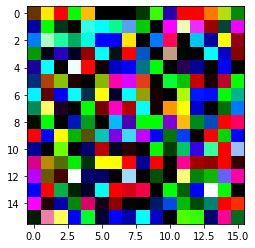

In [50]:
size = 16
noise = np.random.randn(size,size,3)
plt.imshow(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


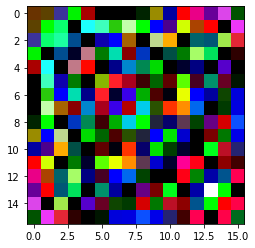

In [51]:
noise = noise / 2. + np.transpose(noise, (1,0,2)) / 2.
plt. imshow(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


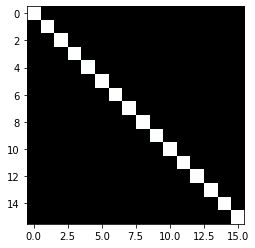

In [68]:
inv = np.moveaxis(noise,2,0) @ np.linalg.inv(np.moveaxis(noise,2,0))
plt.imshow(np.moveaxis(inv,0,2))

In [64]:
np.linalg.inv(np.moveaxis(noise,2,0)).shape

(3, 16, 16)

In [66]:
np.moveaxis(noise,2,0).shape

(3, 16, 16)

In [69]:
inv.shape

(3, 16, 16)

<h1> Фильтрация оператором Собела </h1>

In [6]:
import cv2
import numpy as np

img_name = 'z.jpg'

img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
img = img / 255
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

cv2.imshow('Original', img)
cv2.imshow('Sobel horizontal', sobel_horizontal)
cv2.imshow('Sobel vertical', sobel_vertical)
cv2.imshow('norm', abs(sobel_horizontal) + abs(sobel_vertical))
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1> Градиент изображения с помощью фильтра Гаусса </h1>

In [1]:
import cv2
import numpy as np
import math

img = cv2.imread('z.jpg', cv2.IMREAD_GRAYSCALE)

kernel_x = np.zeros((5,5))
for x in range(5):
    for y in range(5):
        kernel_x[x,y] = -1. * (x-2) * math.exp(-0.5*((x-2)**2+(y-2)**2))
print(kernel_x)
gx = cv2.filter2D(img,-1,kernel_x)

kernel_y = np.zeros((5,5))
for x in range(5):
    for y in range(5):
        kernel_y[x,y] = -1. * (y-2) * math.exp(-0.5*((x-2)**2+(y-2)**2))
print(kernel_x, kernel_y)
gy = cv2.filter2D(img,-1,kernel_y)

cv2.imshow('Original', img)
cv2.imshow('gx', gx)
cv2.imshow('gy', gy)
cv2.imshow('G', abs(gx) + abs(gy))
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0.03663128  0.16417     0.27067057  0.16417     0.03663128]
 [ 0.082085    0.36787944  0.60653066  0.36787944  0.082085  ]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.082085   -0.36787944 -0.60653066 -0.36787944 -0.082085  ]
 [-0.03663128 -0.16417    -0.27067057 -0.16417    -0.03663128]]
[[ 0.03663128  0.16417     0.27067057  0.16417     0.03663128]
 [ 0.082085    0.36787944  0.60653066  0.36787944  0.082085  ]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.082085   -0.36787944 -0.60653066 -0.36787944 -0.082085  ]
 [-0.03663128 -0.16417    -0.27067057 -0.16417    -0.03663128]] [[ 0.03663128  0.082085   -0.         -0.082085   -0.03663128]
 [ 0.16417     0.36787944 -0.         -0.36787944 -0.16417   ]
 [ 0.27067057  0.60653066 -0.         -0.60653066 -0.27067057]
 [ 0.16417     0.36787944 -0.         -0.36787944 -0.16417   ]
 [ 0.03663128  0.082085   -0.         -0.082085   -0.03663128]]


<h1> Оператор Кенни </h1>

In [12]:
import cv2
import numpy as np
import math

img = cv2.imread('z.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,50,100)

cv2.imshow('Original', img)
cv2.imshow('Canny', edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

<h1> Поиск прямых линий методом Хаффа </h1>

In [5]:
import cv2 as cv
import numpy as np
import math

img = cv.imread('SS.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img,200,200)

cv.imshow('Original', img)
cv.imshow('Canny', edges)

cdst = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 1, cv.LINE_AA)


linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)

cv.imshow("Source", img)
cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

cv.waitKey(0)
cv.destroyAllWindows()

<h1> Поиск окружностей методом Хаффа </h1>

In [13]:
import numpy as np
import cv2 as cv
img = cv.imread('hf_circle.jpg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,250,
                            param1=250,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

<h1> Поиск оптического потока алгоритмом Лукаса-Канаде </h1>

In [3]:
import numpy as np
import cv2 as cv
import random
from matplotlib import pyplot as plt
cap = cv.VideoCapture("vtest.avi")    #("test.mp4")    ("vtest.avi") 

#размеры выходной картинки
fheight = 500
fwidth = 500
#размер сетки для отображения потока
grid = 20
#размер ядра алгоритма
kernel = 10


fourcc = cv.VideoWriter_fourcc(*'MJPG')
#out = cv.VideoWriter('out.avi',fourcc, 20.0, (fwidth,fheight))
if not cap.isOpened():
    print("Cannot open camera")
    exit()
ret, frame = cap.read()
#fheight = frame.shape[1]
#fwidth = frame.shape[0]

kernel_s = (3,3)
op_k = cv.getStructuringElement(cv.MORPH_RECT, kernel_s)

frame = cv.resize(frame,(fwidth,fheight))
#cv.resize()
g1 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#g1 = cv.morphologyEx(g1, cv.MORPH_OPEN, op_k)
#cv.waitKey(1000)
x = 0
m = 0
while True:

    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.resize(frame,(fwidth,fheight))
    
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #gray = cv.morphologyEx(gray, cv.MORPH_OPEN, op_k)
    gX = cv.Sobel(gray, ddepth=cv.CV_32F, dx=1, dy=0, ksize=3)
    #gX = cv.morphologyEx(gX, cv.MORPH_OPEN, op_k)
    gY = cv.Sobel(gray, ddepth=cv.CV_32F, dx=0, dy=1, ksize=3)
    #gY = cv.morphologyEx(gY, cv.MORPH_OPEN, op_k)
    #gX = cv.convertScaleAbs(gX)
    #gY = cv.convertScaleAbs(gY)
    gT = g1 - gray
    #print(np.min(gX), np.min(gT))
    #cv.imshow("Sobel/Scharr X", gX)
    V = np.zeros((fwidth,fheight,2), dtype = np.float32)
    #GR = 
    flow = np.zeros((fwidth,fheight))
    d = int(kernel / 2)
    for i in range(d,fwidth-d):
        for j in range(d,fheight-d):
            if (i%grid==0 and j%grid==0):
                li = i - d
                lj = j - d
                A = np.zeros((kernel*kernel,2))
                b = np.zeros((kernel*kernel))
                for k in range(kernel):
                    for l in range(kernel):
                        A[k*kernel+l,0] = gX[li+k,lj+l]
                        A[k*kernel+l,1] = gY[li+k,lj+l]
                        b[k*kernel+l] = gT[li+k,lj+l]
                #print(A,b)
                #print(np.linalg.eig(A.T @ A))
                try:
                    V[i,j] = -1 * np.linalg.inv(A.T @ A) @ A.T @ b
                    w, _ = np.linalg.eig(A.T@A)
                    l1 = np.max(w)
                    l2 = np.min(w)
                    if(np.sum(w<0.001) > 0):
                        V[i,j] = (0,0)
                    if(l1/l2 > 2):
                        V[i,j] = (0,0)
                except:
                    V[i,j] = (0,0)
                cv.line(frame,(np.float32(j),np.float32(i)), (np.float32(j+V[i,j,0]), np.float32(i + V[i,j,1])), (255,0,0), 2)
    mask = (V[:,:,0]*V[:,:,0] + V[:,:,1]*V[:,:,1]) > 50
    #print(mask.shape)
    #print(np.max(V))
    frame[mask] = (255,0,0)
    for i in range(fwidth):
        for j in range(fheight):
            if (i%grid==0 and j%grid==0):
                cv.line(flow,(np.float32(i),np.float32(j)), (np.float32(i+V[i,j,0]), np.float32(j + V[i,j,1])), (255,0,0), 2)
    cv.imshow("1", frame)
    x+=1
    #cv.waitKey(1000)
    g1 = np.array(gray)
    #cv.circle(frame,(random.randint(0,1000),random.randint(0,1000)), random.randint(10,100), (0,255,0))
    #print(frame.shape)
    # if frame is read correctly ret is True
    
    # Our operations on the frame come hereqqq
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resultinqg frame
    #out.write(frame)
    #cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

<ipython-input-3-581c5aab02c1>:84: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv.line(frame,(np.float32(j),np.float32(i)), (np.float32(j+V[i,j,0]), np.float32(i + V[i,j,1])), (255,0,0), 2)
<ipython-input-3-581c5aab02c1>:92: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv.line(flow,(np.float32(i),np.float32(j)), (np.float32(i+V[i,j,0]), np.float32(j + V[i,j,1])), (255,0,0), 2)


<h1>Трекинг особых точек встроенным методом Лукаса-Канаде </h1>

In [36]:
import numpy as np
import cv2

cap = cv2.VideoCapture("test.mp4")

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

<ipython-input-36-52fa4211491d>:43: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
<ipython-input-36-52fa4211491d>:44: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<h1> Встроенный метод Лукаса-Канаде для оптического потока </h1>

In [ ]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
cap = cv2.VideoCapture(0)

method = cv2.optflow.calcOpticalFlowSparseToDense
#frames = dense_optical_flow(method, video_path, save, to_gray=True)
ret, old_frame = cap.read()
old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
while True:
    # Read the next frame
    ret, new_frame = cap.read()
    frame_copy = new_frame
    if not ret:
        break
    # Preprocessing for exact method
    hsv = np.zeros_like(new_frame)
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    
    flow = method(old_frame, new_frame, None)
    # Encoding: convert the algorithm's output into Polar coordinates
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Use Hue and Value to encode the Optical Flow
    
    hsv[..., 1] = 255
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    # Convert HSV image into BGR for demo
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    cv2.imshow("frame", frame_copy)
    cv2.imshow("optical flow", bgr)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:
        break
    # Update the previous frame
    old_frame = new_frame


<h1> Выделение особых точек детектором Харриса </h1>

In [4]:
import cv2
import numpy as np

filename = 'z.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

<h1> Пирамида Гаусса </h1>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = 'z.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("0",gray)
gray = np.float32(gray)
sig = 1.5
p = list()
prev = np.array(gray)
prev = prev / 256.
p.append(prev)
d = list()
for c in range(5):
    im = cv2.GaussianBlur(prev, (0,0), sigmaX=sig, sigmaY=sig)
    im = np.float32(im)
    sig *= 1.5
    #cv2.imshow(str(c+1),im)
    cv2.imshow(str(c+1),im - prev)
    prev = np.array(im)
    #d.append(im-prev)
    
    p.append(prev)

while(1):
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

<h1> детектор SIFT </h1>

In [9]:
import cv2
import numpy as np

img = cv2.imread('z.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img,None)

img_1 = cv2.drawKeypoints(gray,keypoints_1,img)


cv2.imshow('1',img)
while(1):
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\opencv_contrib-4.0.1\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


(687.0, 75.0) (549, 976)
(687.0, 3.0) (549, 976)


<ipython-input-2-7fba93d43b97>:34: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(mas)


NameError: name 'queryDes' is not defined

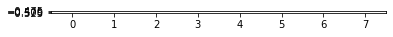

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('z.jpg',0)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create(threshold=25)
(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2) 
#cv2.imshow('1',img)
# find and draw the keypoints
M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
#img = cv2.warpAffine(img, M, (w, h))
kp = fast.detect(img,None)
pt = kp[1].pt
mas = img[int(pt[1])-4:int(pt[1])+4,int(pt[0])-4:int(pt[0])+4]
print(pt, img.shape)
img3 = cv2.drawKeypoints(img, kp, outImage = None, color=(255,0,0))

fast = cv2.FastFeatureDetector_create(threshold=25)
(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2) 
#cv2.imshow('1',img)
# find and draw the keypoints
M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
img = cv2.warpAffine(img, M, (w, h))
kp = fast.detect(img,None)
pt = kp[1].pt
mas = img[int(pt[1])-4:int(pt[1])+4,int(pt[0])-4:int(pt[0])+4]
print(pt, img.shape)
img2 = cv2.drawKeypoints(img, kp, outImage = None, color=(255,0,0))

cv2.imshow('2',img2)
plt.imshow(mas)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(queryDes, trainDes)
matches = sorted(matches, key=lambda x: x.distance)

final_img = cv2.drawMatches(query_img, queryKP,
original_img, trainKP, matches[:20], None)

final_img = cv2.resize(final_img, (1000, 650))

cv2.imshow("Matches", final_img)
print(1)й
while(1):
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

<h1> Сопоставление точек обычным KNN </h1>

In [3]:
query_img = cv2.imread('et.jpg')
#query_img = cv2.resize(query_img,(200,200))
original_img = cv2.imread('ef.jpg') 
query_img_bw = cv2.cvtColor(query_img, cv2.IMREAD_GRAYSCALE)
original_img_bw = cv2.cvtColor(original_img, cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
queryKP, queryDes = orb.detectAndCompute(query_img_bw,None)
trainKP, trainDes = orb.detectAndCompute(original_img_bw,None)

matcher = cv2.BFMatcher()
matches = matcher.radiusMatch(np.asarray(queryDes,np.float32),np.asarray(trainDes,np.float32),260)
#match(queryDes,trainDes)
#matches = sorted(matches, key = lambda x:x.distance)
m = list()

final_img = cv2.drawMatchesKnn(query_img, queryKP, 
                            original_img, trainKP, matches[:20],None)

cv2.imshow("Matches", final_img)
cv2.waitKey()
cv2.destroyAllWindows()

<h1> Сопоставление точек KNN с улучшением </h1>

In [4]:
import cv2
import numpy as np
#query_img = cv2.imread('et.jpg')
#query_img = cv2.flip(query_img, 1)
#original_img = cv2.imread('ef.jpg') 

query_img = cv2.imread(cv2.samples.findFile('box.png'), cv2.IMREAD_GRAYSCALE)
original_img = cv2.imread(cv2.samples.findFile('box_in_scene.png'), cv2.IMREAD_GRAYSCALE)
#query_img = cv2.resize(query_img,(200,200))
img = np.array(query_img)
query_img_bw = cv2.cvtColor(query_img, cv2.IMREAD_GRAYSCALE)
original_img_bw = cv2.cvtColor(original_img, cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(nfeatures=100, scaleFactor=1.1)
queryKP, queryDes = orb.detectAndCompute(query_img_bw,None)
trainKP, trainDes = orb.detectAndCompute(original_img_bw,None)

matcher = cv2.BFMatcher()
matches = matcher.knnMatch(np.asarray(queryDes,np.float32),np.asarray(trainDes,np.float32),10)
#match(queryDes,trainDes)
#matches = sorted(matches, key = lambda x:x.distance)
m = list()
thr = 100
f = True
for l in matches:
    nn = list()
    for i in range(len(l)):
        nn.append(np.linalg.norm(queryDes[l[i].queryIdx]-trainDes[l[i].trainIdx]))
    
    #n1 = np.linalg.norm(queryDes[l[0].queryIdx]-trainDes[l[0].trainIdx])
    #n2 = np.linalg.norm(queryDes[l[1].queryIdx]-trainDes[l[1].trainIdx])
    n1, n2 = np.sort(nn)[:2]
    if (abs(n1-n2) < thr):
        continue
    #if (f and len(m) == 2):
    #    f = False
    #    continue
    m.append(l[np.argmin(np.array(nn))])
    """
    if (n1 > n2):
        m.append(l[1])
    else:
        m.append(l[0])
    """
#m = m[0:3]
final_img = cv2.drawMatches(query_img, queryKP, 
                            original_img, trainKP, m,None)
#cv2.imshow("1", query_img)
cv2.imshow("Matches", final_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [67]:
np.linalg.norm(queryDes[matches[0][0].queryIdx]-trainDes[matches[0][0].trainIdx])

1038.4613618233468

In [68]:
len(l)

10

In [69]:
queryKP[l[2].queryIdx].pt[0]

72.1025390625

In [5]:
m = m[0:3]
n = len(m)
b = np.zeros((n*2))
A = np.zeros((n*2,6))
for i in range(n):
    b[i] = queryKP[m[i].queryIdx].pt[0]
    b[n+i] = queryKP[m[i].queryIdx].pt[1]
    A[i,0] = trainKP[m[i].trainIdx].pt[0]
    A[i,1] = trainKP[m[i].trainIdx].pt[1]
    A[i,2] = 1
    A[n+i,3] = trainKP[m[i].trainIdx].pt[0]
    A[n+i,4] = trainKP[m[i].trainIdx].pt[1]
    A[n+i,5] = 1
ans = np.linalg.solve(A,b)
ans

array([ 9.73581713e-02,  4.95092700e-02,  3.75158509e+01, -5.49355343e-01,
       -5.08946064e+00,  1.16934198e+03])

In [6]:
TR = [[ans[0], ans[1], ans[2]], [ans[3],ans[4],ans[5]], [0,0,1]]
TR = TR * 2

In [7]:
from scipy import ndimage as ndi
imgw = ndi.affine_transform(img, TR)
cv2.imshow("Matches",imgw)
cv2.waitKey()
cv2.destroyAllWindows()

RuntimeError: affine matrix has wrong number of rows

In [236]:
def get_corrected_img(img1, img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=500)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))

        return corrected_img
    return img2
img = get_corrected_img(query_img, original_img)
cv2.imshow("Matches", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np
import math
#query_img = cv2.imread('et.jpg')
#query_img = cv2.flip(query_img, 1)
#original_img = cv2.imread('ef.jpg') 

query_img = cv2.imread(cv2.samples.findFile('box.png'), cv2.IMREAD_GRAYSCALE)
original_img = cv2.imread(cv2.samples.findFile('box_in_scene.png'), cv2.IMREAD_GRAYSCALE)
#query_img = cv2.resize(query_img,(200,200))
img = np.array(query_img)
query_img_bw = cv2.cvtColor(query_img, cv2.IMREAD_GRAYSCALE)
original_img_bw = cv2.cvtColor(original_img, cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()#nfeatures=10000, scaleFactor=1.1)
#orb = cv2.xfeatures2d.SIFT_create()
queryKP, queryDes = orb.detectAndCompute(query_img_bw,None)
trainKP, trainDes = orb.detectAndCompute(original_img_bw,None)
#cv2.xfeatures2d.SURF_create
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(np.asarray(queryDes,np.float32),np.asarray(trainDes,np.float32),10)
#match(queryDes,trainDes)
#matches = sorted(matches, key = lambda x:x.distance)
m = list()
thr = 200
f = True
for l in matches:
    nn = list()
    for i in range(len(l)):
        nn.append(np.linalg.norm(queryDes[l[i].queryIdx]-trainDes[l[i].trainIdx]))
    
    #n1 = np.linalg.norm(queryDes[l[0].queryIdx]-trainDes[l[0].trainIdx])
    #n2 = np.linalg.norm(queryDes[l[1].queryIdx]-trainDes[l[1].trainIdx])
    n1, n2 = np.sort(nn)[:2]
    if (abs(n1-n2) < thr):
        continue
    #if (f and len(m) == 2):
    #    f = False
    #    continue
    m.append(l[np.argmin(nn)])
    """
    if (n1 > n2):
        m.append(l[1])
    else:
        m.append(l[0])
    """
#m = m[0:3]
final_img = cv2.drawMatches(query_img, queryKP, 
                            original_img, trainKP, m,None)
#cv2.imshow("1", query_img)
cv2.imshow("Matches", final_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
a = np.array([3,2,1])
print(a)
a1, a2, a3 = np.sort(a)
print(a2)

[3 2 1]
2


<h1> Поиск афинного преобразования </h1>

In [11]:
img1 = cv2.imread(cv2.samples.findFile('box.png'), cv2.IMREAD_GRAYSCALE)
scale = 2
img1 = cv2.resize(img1,(int(img1.shape[1]/scale), int(img.shape[0]/scale)))
print(img1.shape)
img2 = cv2.imread(cv2.samples.findFile('box_in_scene.png'), cv2.IMREAD_GRAYSCALE)
#img1 = cv2.circle(img1, (139,200), radius=5,color=(0, 0, 255), thickness=-1)
cv2.imshow("1",img1)
cv2.waitKey()
cv2.destroyAllWindows()

(111, 162)


In [108]:
  q     t
(0,0) (120,162)
(324,223) (268,294)
(139,200) (165,270)

SyntaxError: invalid syntax (<ipython-input-108-d18a6946ab90>, line 1)

In [12]:
#q = np.array([[0,0], [324,223], [139,200]])
#t = np.array([[120,162], [268,294], [165,270]])
q = np.array([[0,0], [224,324], [200, 140]])
t = np.array([[162,120], [294,268], [270,165]])
q = q/scale
n = 3
b = np.zeros((n*2))
A = np.zeros((n*2,6))
for i in range(n):
    b[2*i] = q[i][0]
    b[2*i+1] = q[i][1]
    A[2*i,0] = t[i][0]
    A[2*i,1] = t[i][1]
    A[2*i,4] = 1
    A[2*i+1,2] = t[i][0]
    A[2*i+1,3] = t[i][1]
    A[2*i+1,5] = 1
    
    """|
    A[i,0] = t[i][0]
    A[i,1] = t[i][1]
    A[i,2] = 1
    A[n+i,3] = t[i][0]
    A[n+i,4] = t[i][1]
    A[n+i,5] = 1
    """
ans = np.linalg.solve(A,b)
#ans =  np.linalg.inv(A) * b
TR = np.array([[ans[0], ans[1], -1*ans[4]], [ans[2],ans[3],-1*ans[5]], [0,0,1]])
#TR  = TR / scale


In [13]:
p = np.zeros((4,2), dtype = np.int32)
p[0] = [0,0]
p[1] = [0,img1.shape[0]-1]
p[3] = [img1.shape[1]-1, 0]
p[2] = [img1.shape[1]-1, img1.shape[0]-1]

for i in range(4):
    p[i] = TR[0:2,0:2] @ p[i] + [TR[0,2], TR[1,2]]
p = p.reshape((-1, 1, 2))

In [14]:
def perspective_warp(image: np.ndarray, transform: np.ndarray):
        h, w = image.shape[:2]
        corners_bef = np.float32([[0, 0], [w, 0], [w, h], [0, h]]).reshape(-1, 1, 2)
        corners_aft = cv2.perspectiveTransform(corners_bef, transform)
        xmin = math.floor(corners_aft[:, 0, 0].min())
        ymin = math.floor(corners_aft[:, 0, 1].min())
        xmax = math.ceil(corners_aft[:, 0, 0].max())
        ymax = math.ceil(corners_aft[:, 0, 1].max())
        x_adj = math.floor(xmin - corners_aft[0, 0, 0])
        y_adj = math.floor(ymin - corners_aft[0, 0, 1])
        translate = np.eye(3)
        translate[0, 2] = -xmin
        translate[1, 2] = -ymin
        corrected_transform = np.matmul(translate, transform)
        return cv2.warpPerspective(image, corrected_transform, (math.ceil(xmax - xmin), math.ceil(ymax - ymin))), x_adj, y_adj


In [18]:
from scipy import ndimage as ndi
#imgw = ndi.affine_transform(img1, TR)
imgw = cv2.warpPerspective(img1, TR, (img2.shape[1],img2.shape[0]))
#imgw = cv2.warpAfine(img1, TR, (img2.shape[1],img2.shape[0]))
#imgw = perspective_warp(img1, TR)
#print(imgw.shape, img2.shape)
#f = np.zeros(img2.shape, dtype = np.uint8)
#f[0:imgw.shape[0], 0:imgw.shape[1]] = imgw
img2 = cv2.polylines(img2, [p], isClosed=1, color = (0,255,0), thickness=3)
numpy_horizontal = np.hstack((imgw, img2))
cv2.imshow("Matches",numpy_horizontal)
#cv2.imshow("Matches",imgw)
cv2.waitKey()
cv2.destroyAllWindows()

In [77]:
h, status = cv2.findHomography(q, t)
print(h, '\n', TR)

[[-4.05929460e-01 -3.54068472e-01  1.62000000e+02]
 [-3.08716349e-01 -2.79734684e-01  1.20000000e+02]
 [-3.75964657e-03 -9.45358816e-04  1.00000000e+00]] 
 [[ 1.94344883e+00 -2.19832736e-01  2.88458781e+02]
 [ 6.11310235e-01  1.64396655e+00  2.96308244e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [78]:
np.linalg.norm(h - TR)

216.99425079434917

In [6]:
!python

^C


In [177]:
q


array([[  0.,   0.],
       [224., 324.],
       [200., 140.]])

In [141]:
TR

array([[ 9.71724413e-01, -1.09916368e-01, -1.44229391e+02],
       [ 3.05655117e-01,  8.21983274e-01, -1.48154122e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [230]:
imgw

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 -85,
 -1)

In [41]:
[p]

[array([[[ 72,  74]],
 
        [[ 88, 119]],
 
        [[167, 110]],
 
        [[150,  65]]])]

<h1> Калибровка камеры </h1>

In [19]:
import numpy as np
import cv2 as cv
import glob
import os
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('data\\data\\left*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

In [135]:
images

['data\\data\\left.jpg',
 'data\\data\\left01.jpg',
 'data\\data\\left02.jpg',
 'data\\data\\left03.jpg',
 'data\\data\\left04.jpg',
 'data\\data\\left05.jpg',
 'data\\data\\left06.jpg',
 'data\\data\\left07.jpg',
 'data\\data\\left08.jpg',
 'data\\data\\left09.jpg',
 'data\\data\\left11.jpg',
 'data\\data\\left12.jpg',
 'data\\data\\left13.jpg',
 'data\\data\\left14.jpg']

In [136]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
mtx

array([[534.07088367,   0.        , 341.53407538],
       [  0.        , 534.11914599, 232.94565269],
       [  0.        ,   0.        ,   1.        ]])

In [141]:
rvecs

[array([[-0.43239599],
        [ 0.25603401],
        [-3.08832021]]),
 array([[ 0.41531697],
        [ 0.65664497],
        [-1.3373494 ]]),
 array([[-0.2645143 ],
        [-0.39360849],
        [-2.74787379]]),
 array([[-0.37843358],
        [-0.18064237],
        [-3.11615996]]),
 array([[-0.45993978],
        [-0.3142018 ],
        [-1.76122223]]),
 array([[-0.29979221],
        [ 0.39216377],
        [-1.4348239 ]]),
 array([[-0.32034625],
        [ 0.1597993 ],
        [-1.24149595]]),
 array([[-0.45883216],
        [-0.08848877],
        [-1.33510786]]),
 array([[-0.35367631],
        [-0.24363035],
        [-1.56874295]]),
 array([[ 0.30697385],
        [ 0.5038552 ],
        [-1.82824733]]),
 array([[-0.17288944],
        [-0.46764681],
        [ 1.34745198]])]

<h1> Эпиполярные линии </h1>

In [20]:
import numpy as np
import cv2 as cv
K =  np.array([[655.3076, 0,  340.3110], [0, 653.5052, 245.3426], [0,  0, 1.0000]])
H_c2_c1 = np.array([[0.939891, 0.042845, -0.338777, 0.972073], 
                    [-0.070203, 0.995150, -0.068912, 0.217070], 
                    [0.334181, 0.088553, 0.938340, 0.089186],
                    [0.000000, 0.000000, 0.000000, 1.000000]])
Pc2org_c1 = np.array([0.972073, 0.217070, 0.089186])
t = Pc2org_c1
t

array([0.972073, 0.21707 , 0.089186])

In [21]:
E = [[0, -t[2], t[1]], [t[2], 0, -t[0]], [-t[1], t[0], 0]] @ H_c2_c1[0:3,0:3]
E

array([[ 0.07880179, -0.06953125,  0.20983145],
       [-0.24102321, -0.08225881, -0.94234914],
       [-0.27226458,  0.95805808,  0.00655083]])

In [22]:
p2 = np.array([[366, 364, 361], [163,  261, 353], [1,   1,   1]])
pn2 = np.linalg.inv(K) @ p2
pn2

array([[ 0.03920144,  0.03614944,  0.03157143],
       [-0.12600145,  0.02395911,  0.1647384 ],
       [ 1.        ,  1.        ,  1.        ]])

In [23]:
img = cv.imread('data\\data\\cube2.jpg')
img1 = cv.imread('data\\data\\cube1.jpg')
print(img.shape)
for i in range(pn2.shape[1]):
    print(pn2[:,i])
    l = E @ pn2[:,i].T
    R = 1
    pLine0 = [-1, (-l[2]-l[0]*(-1))/l[1], 1]
    pLine1 = [1, (-l[2]-l[0])/l[1], 1]
    
    pLine0 = np.array(K @ pLine0, dtype = int)
    pLine1 = np.array(K @ pLine1, dtype = int)
    print(l, pLine0, pLine1)
    cv.line(img,(pLine0[0], pLine0[1]), (pLine1[0], pLine1[1]), (0,0,255), 3)
    cv.circle(img1,(p2[0][i], p2[1][i]), 3, (0,0,255), -1)
cv.imshow('qaa',img)
cv.imshow('2',img1)
cv.waitKey()
cv.destroyAllWindows()

(480, 640, 3)
[ 0.03920144 -0.12600145  1.        ]
[ 0.22168163 -0.94143287 -0.12483904] [-314    4    1] [995 312   1]
[0.03614944 0.02395911 1.        ]
[ 0.21101418 -0.95303284  0.01966283] [-314  114    1] [995 403   1]
[0.03157143 0.1647384  1.        ]
[ 0.20086487 -0.96350978  0.155784  ] [-314  214    1] [995 487   1]


In [5]:
type(img)

numpy.ndarray

In [6]:
!dir

 Том в устройстве C не имеет метки.
 Серийный номер тома: 901D-1A3D

 Содержимое папки C:\Users\great\projects\контест

08.12.2021  11:34    <DIR>          .
08.12.2021  11:34    <DIR>          ..
27.06.2021  12:01    <DIR>          .ipynb_checkpoints
11.09.2021  11:34            59 475 1.jpg
11.09.2021  12:32           549 749 1.mkv
28.11.2021  15:54         9 108 540 1608650180188378672.png
12.11.2021  19:37            50 728 box.png
12.11.2021  19:37           122 490 box_in_scene.png
09.04.2021  23:52            16 979 CSC2021.ipynb
20.11.2021  10:59    <DIR>          data
06.11.2021  13:24            50 178 ef.jpg
06.11.2021  13:22            29 498 et.jpg
06.11.2021  10:43            62 580 f1.jpg
06.11.2021  10:39           104 080 f2.jpg
06.11.2021  10:22           146 130 full.jpg
06.11.2021  12:59           209 147 Hf.jpg
06.11.2021  12:58             9 321 ht.jpg
06.11.2021  12:59            28 611 ht1.png
06.11.2021  13:17            45 626 ht3.jpg
28.11.2021  17:15        

In [24]:
def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),1,(255,0,0),-1)
        mouseX,mouseY = x,y
        
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(20) & 0xFF
    if k == 27:
        break
    elif k == ord('a'):
        print (mouseX,mouseY)

NameError: name 'mouseX' is not defined

In [25]:
cv.destroyAllWindows()

<h1> Поиск существенной матрицы </h1>

In [26]:
img = cv.imread('data\\data\\cube2.jpg')
img1 = cv.imread('data\\data\\cube1.jpg')
x0 = [260, 311, 386, 262, 310, 385, 265, 313, 383, 309]
y0 = [149, 147, 148, 234, 240, 237, 319, 334, 324, 50]
x1 = [284, 366, 413, 285, 365, 409, 286, 362, 407, 369]
y1 = [159, 164, 158, 250, 261, 246, 334, 354, 328, 62]



A = np.zeros((10,9), dtype = float)
N = len(x0)
p0 = np.zeros((3,len(x0)))
p1 = np.zeros((3,len(x0)))
for i in range(len(x0)):
    p0[:,i] = np.linalg.inv(K) @ np.array([x0[i],y0[i],1.], dtype = np.float).T
    p1[:,i] = np.linalg.inv(K) @ np.array([x1[i], y1[i], 1.], dtype = np.float).T
    #print(p0, p1)
xn = p0[0:2,:]
t = (1./N) * np.sum(xn,1)
t = np.expand_dims(t, -1)
print(t.shape)
xnc = xn - t @ np.ones((1,N))
dc = np.sqrt(np.sum(np.square(xnc), 0))
davg = (1./N)*np.sum(dc)
s = np.sqrt([2]) / davg
#print(s*np.eye(2))
T1 = np.block([[s*np.eye(2), -s*t],[0,0,1]])
p1s = T1 @ p0

xn = p1[0:2,:]
t = (1./N) * np.sum(xn,1)
t = np.expand_dims(t, -1)
print(t.shape)
xnc = xn - t @ np.ones((1,N))
dc = np.sqrt(np.sum(np.square(xnc),0))
davg = (1./N)*np.sum(dc)
s = np.sqrt([2]) / davg
#print(s*np.eye(2))
T2 = np.block([[s*np.eye(2), -s*t],[0,0,1]])
p2s = T2 @ p1
#    A[i,:] = [p0[0]*p1[0], p0[0]*p1[1], p0[0], p0[1]*p1[0], p0[1]*p1[1], p0[1], p1[0], p1[1], 1.]

A = np.array([p1s[0,:].T * p2s[0,:].T, p1s[0,:].T*p2s[1,:].T, p1s[0,:].T, p1s[1,:].T*p2s[0,:].T, p1s[1,:].T*p2s[1,:].T, p1s[1,:].T, 
              p2s[0,:].T, p2s[1,:].T, np.ones((p1s.shape[1]))]).T
for i in range(len(x0)):
    cv.circle(img,(x0[i],y0[i]),3,(255,0,0),-1)
    cv.circle(img1,(x1[i],y1[i]),3,(255,0,0),-1)
cv.imshow('image',img)
cv.imshow('image1',img1)
cv.waitKey()
cv.destroyAllWindows()
print(T1, '\n',  T2)
print(p1s, '\n',  p2s)
print(p1s[0,:].T * p2s[0,:].T)
A

(2, 1)
(2, 1)
[[9.91183695 0.         0.33141422]
 [0.         9.91183695 0.41167695]
 [0.         0.         1.        ]] 
 [[ 9.7460365   0.         -0.21251259]
 [ 0.          9.7460365   0.20494999]
 [ 0.          0.          1.        ]]
[[-0.88332758 -0.1119285   1.02248193 -0.85307664 -0.12705397  1.00735646
  -0.80770022 -0.08167755  0.97710551 -0.14217944]
 [-1.04956949 -1.07990386 -1.06473668  0.23964159  0.33064472  0.28514316
   1.52885266  1.7563605   1.60468861 -2.55112121]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]] 
 [[-1.04999572  0.16954605  0.8685517  -1.03512326  0.15467359  0.80906186
  -1.0202508   0.11005621  0.77931694  0.21416343]
 [-1.08271862 -1.00815122 -1.0976321   0.27440803  0.4384563   0.21475411
   1.52714032  1.82540991  1.43765944 -2.52932615]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]]
[ 0.92749018 -0.018

array([[ 0.92749018,  0.95639522, -0.88332758,  1.10204347,  1.13638843,
        -1.04956949, -1.04999572, -1.08271862,  1.        ],
       [-0.01897703,  0.11284085, -0.1119285 , -0.18309344,  1.0887064 ,
        -1.07990386,  0.16954605, -1.00815122,  1.        ],
       [ 0.88807842, -1.12230899,  1.02248193, -0.92477885,  1.16868915,
        -1.06473668,  0.8685517 , -1.0976321 ,  1.        ],
       [ 0.88303947, -0.23409108, -0.85307664, -0.24805858,  0.06575957,
         0.23964159, -1.03512326,  0.27440803,  1.        ],
       [-0.01965189, -0.05570761, -0.12705397,  0.05114201,  0.14497326,
         0.33064472,  0.15467359,  0.4384563 ,  1.        ],
       [ 0.81501369,  0.21633394,  1.00735646,  0.23069845,  0.06123566,
         0.28514316,  0.80906186,  0.21475411,  1.        ],
       [ 0.8240568 , -1.23347157, -0.80770022, -1.55981315,  2.33477254,
         1.52885266, -1.0202508 ,  1.52714032,  1.        ],
       [-0.00898912, -0.14909501, -0.08167755,  0.19329838,  3

In [20]:
U, s, V = np.linalg.svd(A, full_matrices=True)
print(V.T)
E1 = np.reshape(V.T[:,V.shape[0]-1], (3,3))
E1

[[-0.08780446  0.10904778 -0.02594108  0.07510495 -0.62871282 -0.67595253
  -0.03262779  0.34475798  0.04439589]
 [-0.0287054  -0.02178169  0.57172769  0.39358623  0.07272389 -0.06527555
   0.70991855  0.03469528 -0.04670243]
 [ 0.01102444  0.01069801  0.38815677 -0.57695916 -0.13539603 -0.2691944
   0.00621784 -0.58185892 -0.29465283]
 [ 0.05643114  0.02798639  0.60455524  0.38862225 -0.02261657  0.06145077
  -0.68862632 -0.02251206  0.02274414]
 [-0.92805273  0.19307857  0.02003574 -0.01574544  0.28615278 -0.11212744
  -0.07922822  0.00289451 -0.00692652]
 [ 0.16921514  0.68234657  0.01884542 -0.02368379  0.08744932 -0.08748056
   0.06386294 -0.25562205  0.64817589]
 [-0.01684513 -0.02673372  0.394012   -0.59243834  0.00255763  0.23883693
   0.0194403   0.6032336   0.26730989]
 [ 0.16880703  0.67524447 -0.01712477 -0.015859    0.10602539  0.08866166
  -0.00879076  0.28107124 -0.64561888]
 [-0.26356243  0.16489542 -0.00255056  0.05913087 -0.69268255  0.61437454
   0.09947575 -0.180634

array([[ 0.04439589, -0.04670243, -0.29465283],
       [ 0.02274414, -0.00692652,  0.64817589],
       [ 0.26730989, -0.64561888, -0.0072126 ]])

In [21]:
U, s, V = np.linalg.svd(E1, full_matrices=True)
E1 = U @ np.diag([1,1,0]) @ V
E1 = T1.T @ E1 @ T2
E1

array([[ 2.62719585, -7.32604978, -4.29921018],
       [ 2.0723205 , -2.64345368,  8.92823805],
       [ 3.92111268, -9.31142679, -0.04032805]])

In [22]:
c = E[0,0] / E1[0,0]
E1 = E1 * c
E1, E

(array([[ 0.07880179, -0.21974223, -0.12895326],
        [ 0.06215851, -0.07928944,  0.26779929],
        [ 0.11761236, -0.2792929 , -0.00120963]]),
 array([[ 0.07880179, -0.06953125,  0.20983145],
        [-0.24102321, -0.08225881, -0.94234914],
        [-0.27226458,  0.95805808,  0.00655083]]))

In [23]:
np.linalg.norm(E-E1)

1.8376145732745064

In [19]:
np.linalg.matrix_rank(E1)

2

In [27]:
img = cv.imread('data\\data\\cube2.jpg')
img1 = cv.imread('data\\data\\cube1.jpg')
x0 = [260, 311, 386, 262, 310, 385, 265, 313, 383, 309]
y0 = [149, 147, 148, 234, 240, 237, 319, 334, 324, 50]
x1 = [284, 366, 413, 285, 365, 409, 286, 362, 407, 369]
y1 = [159, 164, 158, 250, 261, 246, 334, 354, 328, 62]



A = np.zeros((10,9), dtype = float)
N = len(x0)
#p0 = np.zeros((3,len(x0)))
#p1 = np.zeros((3,len(x0)))
for i in range(len(x0)):
    p0 = np.linalg.inv(K) @ np.array([x0[i],y0[i],1.], dtype = np.float).T
    print(p0)
    p1 = np.linalg.inv(K) @ np.array([x1[i], y1[i], 1.], dtype = np.float).T
    A[i,:] = [p0[0]*p1[0], p0[0]*p1[1], p0[0], p0[1]*p1[0], p0[1]*p1[1], p0[1], p1[0], p1[1], 1.]
for i in range(len(x0)):
    clr = (255,0,0)
    if (i == 9):
        clr = (0,0,255)
    cv.circle(img,(x0[i],y0[i]),3,clr,-1)
    cv.circle(img1,(x1[i],y1[i]),3,clr,-1)
cv.imshow('image',img)
cv.imshow('image1',img1)
cv.waitKey()
cv.destroyAllWindows()
#print(T1, '\n',  T2)
#print(p1s, '\n',  p2s)
#print(p1s[0,:].T * p2s[0,:].T)
A

[-0.12255466 -0.14742438  1.        ]
[-0.04472861 -0.1504848   1.        ]
[ 0.06972146 -0.14895459  1.        ]
[-0.11950266 -0.01735656  1.        ]
[-0.04625461 -0.0081753   1.        ]
[ 0.06819546 -0.01276593  1.        ]
[-0.11492466  0.11271127  1.        ]
[-0.04167661  0.13566441  1.        ]
[0.06514345 0.12036232 1.        ]
[-0.04778061 -0.29891514  1.        ]


array([[ 1.05312001e-02,  1.61922016e-02, -1.22554660e-01,
         1.26682711e-02,  1.94780461e-02, -1.47424382e-01,
        -8.59306378e-02, -1.32122285e-01,  1.00000000e+00],
       [-1.75342593e-03,  5.56742574e-03, -4.47286129e-02,
        -5.89922054e-03,  1.87310292e-02, -1.50484801e-01,
         3.92014376e-02, -1.24471236e-01,  1.00000000e+00],
       [ 7.73374659e-03, -9.31844650e-03,  6.97214560e-02,
        -1.65225618e-02,  1.99081527e-02, -1.48954591e-01,
         1.10923481e-01, -1.33652494e-01,  1.00000000e+00],
       [ 1.00865784e-02, -8.51671386e-04, -1.19502658e-01,
         1.46497386e-03, -1.23696685e-04, -1.73565566e-02,
        -8.44046368e-02,  7.12679868e-03,  1.00000000e+00],
       [-1.74266278e-03, -1.10821917e-03, -4.62546139e-02,
        -3.08007936e-04, -1.95872836e-04, -8.17529838e-03,
         3.76754367e-02,  2.39591055e-02,  1.00000000e+00],
       [ 7.14821195e-03,  6.86018905e-05,  6.81954551e-02,
        -1.33811785e-03, -1.28420106e-05, -1.276592

In [135]:
U, s, V = np.linalg.svd(A, full_matrices=True)
print(V.T)
E1 = np.reshape(V.T[:,V.shape[0]-1], (3,3))
E1

[[-0.00444687  0.00557537 -0.01194491  0.18481666  0.2223626   0.04656981
   0.07695407  0.00104043 -0.9529493 ]
 [-0.00101539 -0.0275041  -0.00343572 -0.02526244  0.09067958 -0.68340114
  -0.55447613 -0.46041171 -0.06252909]
 [ 0.03346051  0.01141446  0.69729612  0.40799469  0.50312062  0.09037905
   0.08630342 -0.19435065  0.19887024]
 [ 0.00159789  0.0216545  -0.01498722  0.07766769  0.04896872 -0.70296647
   0.65752551  0.24954601  0.04581317]
 [-0.01957076 -0.07232632  0.00175244 -0.79000657  0.59122396  0.04765372
   0.12397737 -0.05544643 -0.0033321 ]
 [ 0.04271324  0.70023082  0.02613184  0.00421321  0.22783766 -0.0928855
  -0.35560986  0.56527431  0.02491219]
 [-0.02175627 -0.03079874  0.71596159 -0.39237675 -0.49647656 -0.1012762
  -0.05627595  0.16695484 -0.21031131]
 [ 0.02225664  0.70695262 -0.00594947 -0.11586274 -0.19606077  0.08547455
   0.31909881 -0.58093212 -0.03480171]
 [-0.99783812  0.04825305  0.00875628  0.03465346  0.0204751   0.00159686
  -0.00514105  0.0030330

array([[-0.9529493 , -0.06252909,  0.19887024],
       [ 0.04581317, -0.0033321 ,  0.02491219],
       [-0.21031131, -0.03480171,  0.01599353]])

In [171]:
c = E[0,0] / E1[0,0]
E1 = E1 * c
E1, E

(array([[ 0.07880179, -0.21974223, -0.12895326],
        [ 0.06215851, -0.07928944,  0.26779929],
        [ 0.11761236, -0.2792929 , -0.00120963]]),
 array([[ 0.07880179, -0.06953125,  0.20983145],
        [-0.24102321, -0.08225881, -0.94234914],
        [-0.27226458,  0.95805808,  0.00655083]]))

In [172]:
np.linalg.norm(E-E1)

1.8376145732745064

In [183]:
E

array([[ 0.07880179, -0.06953125,  0.20983145],
       [-0.24102321, -0.08225881, -0.94234914],
       [-0.27226458,  0.95805808,  0.00655083]])

<h1> Задача триангуляции </h1>

In [214]:
U, s, V = np.linalg.svd(E, full_matrices=True)
W = np.array([[0,-1,0],[1,0,0],[0,0,1]])
U@W@V.T, np.expand_dims(U[:,2], -1)

(array([[ 0.33785011,  0.94045643,  0.03740318],
        [ 0.58715862, -0.24165686,  0.77255855],
        [-0.73559639,  0.23904739,  0.6338409 ]]),
 array([[0.97207327],
        [0.21707006],
        [0.08918602]]))

In [226]:
H_c2_c1

array([[ 0.939891,  0.042845, -0.338777,  0.972073],
       [-0.070203,  0.99515 , -0.068912,  0.21707 ],
       [ 0.334181,  0.088553,  0.93834 ,  0.089186],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

In [235]:
Mt = np.block([[U@W@V, np.expand_dims(U[:,2], -1)], [np.array([0,0,0,1])]])
if np.linalg.det(Mt) < 0:
    Mt[0:3,0:3] = -1*Mt[0:3,0:3]
Mt

array([[ 0.93989076,  0.04284513, -0.33877669,  0.97207327],
       [-0.07020295,  0.99514958, -0.06891202,  0.21707006],
       [ 0.33418093,  0.0885529 ,  0.93833975,  0.08918602],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [236]:
Mt = np.block([[U@W@V, -1*np.expand_dims(U[:,2], -1)], [np.array([0,0,0,1])]])
if np.linalg.det(Mt) < 0:
    Mt[0:3,0:3] = -1*Mt[0:3,0:3]
Mt

array([[ 0.93989076,  0.04284513, -0.33877669, -0.97207327],
       [-0.07020295,  0.99514958, -0.06891202, -0.21707006],
       [ 0.33418093,  0.0885529 ,  0.93833975, -0.08918602],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [237]:
Mt = np.block([[U@W.T@V, np.expand_dims(U[:,2], -1)], [np.array([0,0,0,1])]])
if np.linalg.det(Mt) < 0:
    Mt[0:3,0:3] = -1*Mt[0:3,0:3]
Mt

array([[ 0.86468161,  0.47344916, -0.167844  ,  0.97207327],
       [ 0.47317528, -0.87985782, -0.04421956,  0.21707006],
       [-0.16861457, -0.0411838 , -0.98482131,  0.08918602],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [238]:
Mt = np.block([[U@W.T@V, -1*np.expand_dims(U[:,2], -1)], [np.array([0,0,0,1])]])
if np.linalg.det(Mt) < 0:
    Mt[0:3,0:3] = -1*Mt[0:3,0:3]
Mt

array([[ 0.86468161,  0.47344916, -0.167844  , -0.97207327],
       [ 0.47317528, -0.87985782, -0.04421956, -0.21707006],
       [-0.16861457, -0.0411838 , -0.98482131, -0.08918602],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [67]:
p1 = np.zeros((3,len(x0)))
p2 = np.zeros((3,len(x0)))
#M1 = np.block(())
R = H_c2_c1[0:3,0:3].T
t = H_c2_c1[0:3,3]
#print(R,t)
t1 = -R.T @ t
P1 = np.zeros((4, len(x0)))
M2 = np.block([R, np.expand_dims(t1,-1)])
M1 = np.array(np.block([np.eye(3), np.zeros((3,1))]))
for i in range(len(x0)):
    p1[:,i] = np.linalg.inv(K) @ np.array([x0[i],y0[i],1.], dtype = np.float).T
    p2[:,i] = np.linalg.inv(K) @ np.array([x1[i], y1[i], 1.], dtype = np.float).T
for i in range(len(x0)):
    p1x = np.array([[0, -p1[2,i], p1[1,i]], [p1[2,i], 0, -p1[0,i]], [-p1[1,i], p1[0,i], 0]])
    p2x = np.array([[0, -p2[2,i], p2[1,i]], [p2[2,i], 0, -p2[0,i]], [-p2[1,i], p2[0,i], 0]])
    A = np.block([[p1x@M1], [p2x@M2]])
    U, s, V = np.linalg.svd(A, full_matrices=True)
    P = V.T[:,V.shape[0]-1]
    #print(A)
    P1[:,i] = P/P[3] 
    print(P1[:,i])
print(M1, '\n',  np.linalg.inv(H_c2_c1))

[-0.36211771 -0.43623751  2.95550313  1.        ]
[-0.14882098 -0.49518836  3.31248489  1.        ]
[ 0.19080778 -0.40413414  2.76065056  1.        ]
[-0.35867118 -0.07241802  3.01676111  1.        ]
[-0.15442114 -0.05671421  3.39810254  1.        ]
[ 0.19254612 -0.07209958  2.75214154  1.        ]
[-0.35214913  0.28926539  3.07055417  1.        ]
[-0.14261739  0.38721021  3.41136117  1.        ]
[0.1866608  0.24664911 2.81749755 1.        ]
[-0.16698859 -0.96887036  3.32981116  1.        ]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]] 
 [[ 0.93989047 -0.07020283  0.33418106 -0.92820749]
 [ 0.04284516  0.99514915  0.08855284 -0.26556332]
 [-0.33877657 -0.06891211  0.93833943  0.26058757]
 [ 0.          0.          0.          1.        ]]


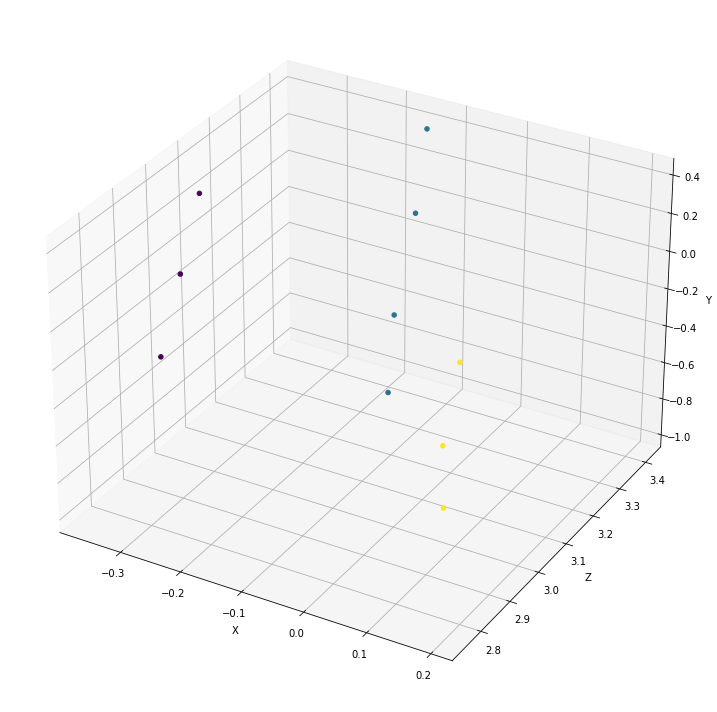

In [79]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P1[0,:], P1[2,:], P1[1,:], c=P1[0,:], alpha=1)
x = ax.set_xlabel('X')
y = ax.set_ylabel('Z')
z = ax.set_zlabel('Y')
plt.show()

In [54]:
P1.shape

(4, 10)